## 클러스터링(Clustering)

---

## k-means clustering

1. 클러스터 중심인 중심점을 구하기 위해 임의의 점 K 선택
2. 각 중심에 대한 거리를 계산하여 각 데이터를 가장 가까운 클러스터로 할당
3. 할당된 데이터 평균을 계산하여 새로운 클러스터 중심을 결정
4. 클러스터 할당이 변경되지 않을 때까지 2-3 과정을 반복

> 클러스터 K 개수를 결정하는 방법

클러스터 개수와 WCSS(within Cluster sum of squares) 간 관계를 그래프로 표현한 후,
WCSS 변경이 평평하게 하락하는 구간을 선택하는 것.

- WCSS : 모든 클러스터에 있는 각 데이터가 중심까지 거리를 제곱하여 합을 계산하는 것
- elbow graph : K 값 범위에 대한 k-means 알고리즘을 무작위로 초기화하고, 각 K 값을 WCSS에 플로팅 함.

> 최적의 엘보를 찾는 법

1. 곡선의 처음과 마지막 점을 직선으로 연결
2. 각 점에서 직선까지 수직 거리 계산
3. 가장 긴 거리를 elbow로 선정

### pytorch로 k-means clustering 구현

In [1]:
# !pip install kmeans_pytorch

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from kmeans_pytorch import kmeans, kmeans_predict

In [3]:
df = pd.read_csv('../080289-main/chap11/data/iris.csv')
df.info()
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...          

In [4]:
data = pd.get_dummies(df, columns=['Species'])
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,1,0,0
1,2,4.9,3.0,1.4,0.2,1,0,0
2,3,4.7,3.2,1.3,0.2,1,0,0
3,4,4.6,3.1,1.5,0.2,1,0,0
4,5,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,0,0,1
146,147,6.3,2.5,5.0,1.9,0,0,1
147,148,6.5,3.0,5.2,2.0,0,0,1
148,149,6.2,3.4,5.4,2.3,0,0,1


In [5]:
from sklearn.model_selection import train_test_split

X, y = train_test_split(data, test_size=0.2, random_state=100)

In [6]:
if torch.cuda.is_available() :
    device = torch.device('cuda:0')
    
else :
    device = torch.device('cpu')

In [7]:
from sklearn.preprocessing import StandardScaler 

# scaling
scaler = StandardScaler()
X_scaled = scaler.fit(data).transform(X)
y_scaled= scaler.fit(y).transform(y)

In [8]:
# to Tensor
X = torch.from_numpy(X_scaled)
y = torch.from_numpy(y_scaled)

In [9]:
# 훈련, 테스트 데이터 셋 크기
print(X.size())
print(y.size())
print(X)

torch.Size([120, 8])
torch.Size([30, 8])
tensor([[ 1.5011e-01, -4.1601e-01, -1.5134e+00, -3.3361e-02, -2.6119e-01,
         -7.0711e-01,  1.4142e+00, -7.0711e-01],
        [ 5.6582e-01, -1.7367e-01, -5.8776e-01,  1.9410e-01,  1.3323e-01,
         -7.0711e-01,  1.4142e+00, -7.0711e-01],
        [ 1.0277e+00,  1.8983e-01, -1.9762e+00,  7.0589e-01,  3.9617e-01,
         -7.0711e-01, -7.0711e-01,  1.4142e+00],
        [-1.4434e+00, -1.2642e+00, -1.2496e-01, -1.3413e+00, -1.4444e+00,
          1.4142e+00, -7.0711e-01, -7.0711e-01],
        [-1.3510e+00, -5.3718e-01,  1.9577e+00, -1.3981e+00, -1.0500e+00,
          1.4142e+00, -7.0711e-01, -7.0711e-01],
        [-5.4272e-01,  6.7450e-01,  3.3785e-01,  4.2156e-01,  3.9617e-01,
         -7.0711e-01,  1.4142e+00, -7.0711e-01],
        [-6.5819e-01, -9.0068e-01,  1.7263e+00, -1.2275e+00, -1.3130e+00,
          1.4142e+00, -7.0711e-01, -7.0711e-01],
        [ 3.3487e-01, -4.1601e-01, -1.2820e+00,  1.3724e-01,  1.3323e-01,
         -7.0711e-01,  1

In [10]:
# Apply
n_clusters = 3
cluster_ids_x, cluster_centers = kmeans(X, n_clusters,distance='euclidean', device=device)

running k-means on cpu..


[running kmeans]: 2it [00:00, 501.32it/s, center_shift=0.000000, iteration=2, tol=0.000100]


In [11]:
# cluster ID / center 값 확인 
print(cluster_ids_x)
print(cluster_centers)

tensor([0, 0, 1, 2, 2, 0, 2, 0, 1, 1, 2, 0, 1, 1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1,
        1, 0, 1, 0, 1, 1, 0, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2, 0, 0,
        2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 2, 0, 1, 1, 1, 0, 2, 2, 2,
        2, 1, 2, 2, 0, 2, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 1, 0,
        0, 2, 1, 1, 1, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 2])
tensor([[-0.0031,  0.0687, -0.6456,  0.2755,  0.1751, -0.7071,  1.4142, -0.7071],
        [ 1.1326,  0.8088, -0.1437,  0.9994,  1.0713, -0.7071, -0.7071,  1.4142],
        [-1.1598, -1.0467,  0.8066, -1.3107, -1.2624,  1.4142, -0.7071, -0.7071]])


In [12]:
# k-means predict
cluster_ids_y = kmeans_predict(y, cluster_centers, 'euclidean', device=device)

predicting on cpu..


In [13]:
print(cluster_ids_y)

tensor([1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 0, 0, 0, 1, 1, 1, 2, 1, 2,
        0, 1, 0, 2, 0, 1])


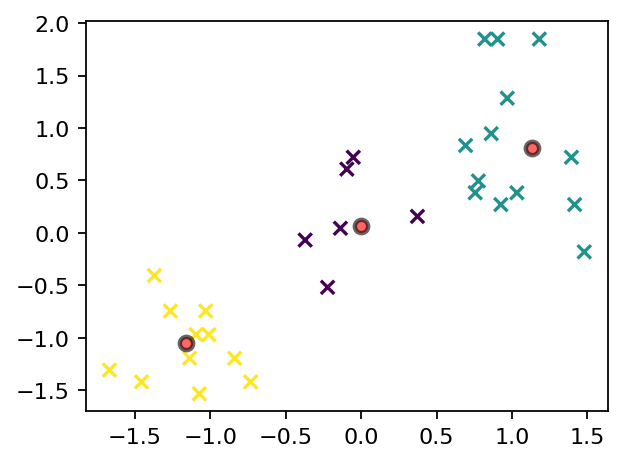

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 3), dpi=160)
plt.scatter(y[:, 0], y[:, 1], c= cluster_ids_y, cmap='viridis', marker='x') # 군집

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
           c='red',
           alpha=0.6, edgecolor = 'black',
           linewidths=2) # 중심점

plt.tight_layout()
plt.show()

---

## 가우시안 혼합 모델(Gaussian Mixture Model)
> 가우시안 분포(gaussian distribution)가 여러개 혼합된 클러스터링 알고리즘

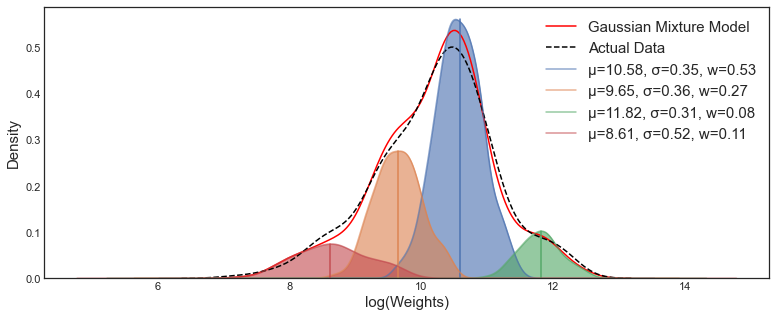

가우시안 혼합 모델을 이용한 분류는 주어진 데이터 $x_n$에 대하여 이 데이터가 어떤 가우시안 분포에 속하는지 찾는 것임.
$$γ(z_{nk}) = P(z_{nk} = 1 | x_n)$$

$z_{nk}(z_{nk}∈{0, 1})$은 $x_n$이 주어졌을 때, 가우시안 혼합 모델의 $K$번째 가우시안 분포가 선택되면 1을 갖고, 아니면 0값을 가짐.
즉, $z_{nk}$가 1이라는 의미는 $x_n$이 $K$번째 가우시안 분포에 속한다는 것임.

=> 가우시안 혼합 모델을 이용한 분류는 $x_n$이 주어졌을 때, $K$개의 $γ(z_{nk})$를 계산하여 가장 높은 값의 가우시안 분포를 선택하는 것

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
X_train = np.load('../080289-main/chap11/data/data.npy')

In [21]:
# GMM 생성
gmm = GaussianMixture(n_components=2) # n_components --> gaussian 개수
gmm.fit(X_train)
print(gmm.means_, '\n')
print(gmm.covariances_)

[[3.04641134 3.10654272]
 [1.60718016 1.35251723]] 

[[[ 0.83656079  0.37865596]
  [ 0.37865596  0.72727426]]

 [[ 0.74995307 -0.5010097 ]
  [-0.5010097   0.74377694]]]


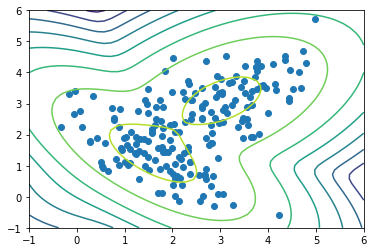

In [22]:
X, Y = np.meshgrid(np.linspace(-1, 6), np.linspace(-1, 6))
XX = np.array([X.ravel(), Y.ravel()]).T

Z = gmm.score_samples(XX)
Z = Z.reshape((50, 50))

plt.contour(X, Y, Z)
plt.scatter(X_train[:, 0], X_train[: ,1])
plt.show()

---

## 자기 조직화 지도(SOM, self-organized Map)

> 신경 생리학적 시스템을 모델링한 것으로, 입력 패턴에 대하여 정확한 답을 주지 않고
스스로 학습하여 클러스터링하는 알고리즘
> 자기조직화 지도는 `입력층(input layer)`와 2차원 격자(grid)로 된 `경쟁층(competitive layer)`로 구성됨.
> 입력층과 경쟁층은 서로 연결되어 있으며, 이 때 가중치는 연결 강도(weight)를 나타내고 0~1 사이 정규화된 값을 사용함

- 자기 조직화 지도 학습 단계
1. 초기화(initialization) : 모든 연결 가중치는 작은 임의 값으로 초기화
2. 경쟁(competition) : 자기 조직화 지도는 경쟁 학습(competive learning)을 이용하여 입력층과 경쟁층을 연결함
연결 강도 벡터가 입력 벡터와 얼마나 가까운지 계산하여 가장 가까운 뉴런이 승리하는 `승자 독점(winner takes all)` 방식을 사용
3. 협력(cooperation) : 승자 뉴런은 네트워크에서 가장 좋은 공간 위치를 차지하게 되며, 승자와 함께 학습할 이웃 크기를 정의
4. 적응(adaptation) : 승리한 뉴런 가중치와 이웃 뉴런을 업데이트(2~3 과정을 원하는 만큼 반복)

In [25]:
# !pip install MiniSom

In [26]:
# import
import numpy as np
from sklearn.datasets import load_digits
from minisom import MiniSom
from pylab import plot, axis, show, pcolor, colorbar, bone

digits = load_digits()

data = digits.data
labels = digits.target 

initialize SOM

--finished -- 


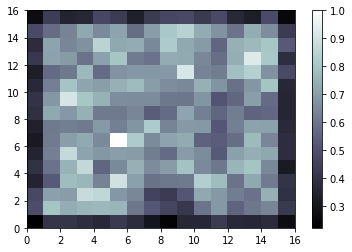

In [28]:
som = MiniSom(16, 16, 64, sigma=1.0, learning_rate=0.5)
som.random_weights_init(data)
print('initialize SOM')
som.train_random(data, 10000)
print('\n--finished -- ')

bone()
pcolor(som.distance_map().T)
colorbar()

In [29]:
# 클래스에 색상 할당
labels[labels=='0'] = 0
labels[labels=='1'] = 1
labels[labels=='2'] = 2
labels[labels=='3'] = 3
labels[labels=='4'] = 4
labels[labels=='5'] = 5
labels[labels=='6'] = 6
labels[labels=='7'] = 7
labels[labels=='8'] = 8
labels[labels=='9'] = 9

C:\Users\PC\anaconda3\envs\yeseul\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  
C:\Users\PC\anaconda3\envs\yeseul\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\PC\anaconda3\envs\yeseul\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
C:\Users\PC\anaconda3\envs\yeseul\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """
C:\Users\PC\anaconda3\envs\yeseul\lib\site-packages\ipyke

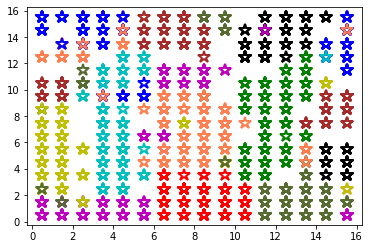

In [32]:
colors = ['r', 'b', 'g', 'y', 'c', 'm', 'k', 'brown', 'coral', 'darkolivegreen']
for cnt, xx in enumerate(data) : 
    w = som.winner(xx) # 승자 노드 식별
    plot(w[0]+.5, w[1]+.5, marker='*',
        markerfacecolor='None', markeredgecolor=colors[labels[cnt]],
        markersize=12, markeredgewidth=2)
show()